# Chapter 9. Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

## Lab: Support Vector Machines

In [2]:
# plot function for SVC
def plot_svc(svc, X, y):
    xx, yy = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-4, 4, 0.1))
    y_predicted = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    y_predicted = y_predicted.reshape(xx.shape)
    
    plt.figure(figsize=(12, 8))
    
    # Separate the graph
    plt.contourf(xx, yy, y_predicted, cmap=plt.cm.Dark2, alpha=0.2)
    #plot the points
    plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.Dark2)
    
    # Support vectors indicated in plot by x
    s_v = svc.support_vectors_
    plt.scatter(s_v[:,0], s_v[:,1], c='k', marker='x', s=40, linewidths='1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print("# Nr of support vectors", len(svc.support_vectors_))

In [3]:
# generate observations
X = np.random.normal(size=(20,2))
y = np.concatenate([-1*np.ones(10), np.ones(10)])
X[y==1, :] +=1


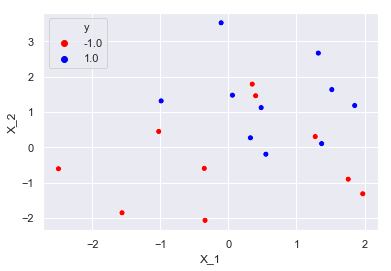

In [4]:
# include the data into a data frame to plot in seaborn
combined = pd.concat([pd.DataFrame(X,columns=['X_1',"X_2"]), pd.Series(y,name='y')],axis=1)

sns.scatterplot(x='X_1',y='X_2', hue='y', legend="full",palette=['red',"blue"], data=combined);

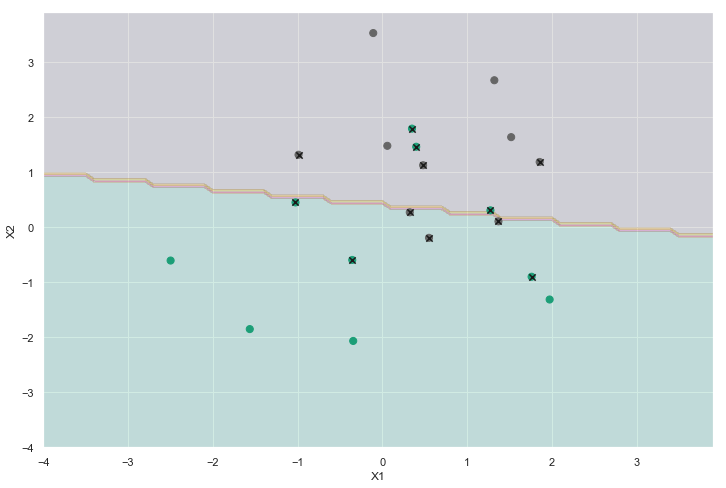

# Nr of support vectors 12


<bound method BaseEstimator.get_params of SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>

In [5]:
svc = SVC(kernel='linear', C=10).fit(X, y)
plot_svc(svc, X, y)

# Information about the support vector classifier
svc.get_params

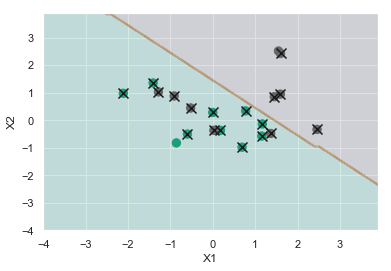

# Nr of support vectors 18


In [189]:
# C=0.1
svc = SVC(kernel='linear', C=0.1).fit(X, y)
plot_svc(svc, X, y)


In [205]:

# Possible values of the parameter C
c = {'C': (0.001, 0.01,0.1,1,5,10,100) }

clf = SVC(kernel='linear')

# Tunning the parameters with cv=1
grid_search = GridSearchCV(estimator=clf, param_grid=c, cv=2, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)



{'C': 0.001}
0.72


In [224]:
# Generate test data set
np.random.seed(3)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

# C=10
svc = SVC(kernel='linear', C=10).fit(X, y)
y_pred = svc.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[10,  2],
       [ 8,  0]])

In [226]:
# C=0.01
svc = SVC(kernel='linear', C=0.01).fit(X, y)
y_pred = svc.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[10,  2],
       [ 8,  0]])

### 9.6.2 Support Vector Machine

In [322]:
# Generate data with a non-linear class boundary

np.random.seed(43)
X = np.random.normal(0, 1, (200, 2))
X[1:100,:]   = X[1:100,:] + 2
X[101:150,:] = X[101:150,:] - 2
y = np.concatenate((np.repeat(0, 150), np.repeat(1, 50)))

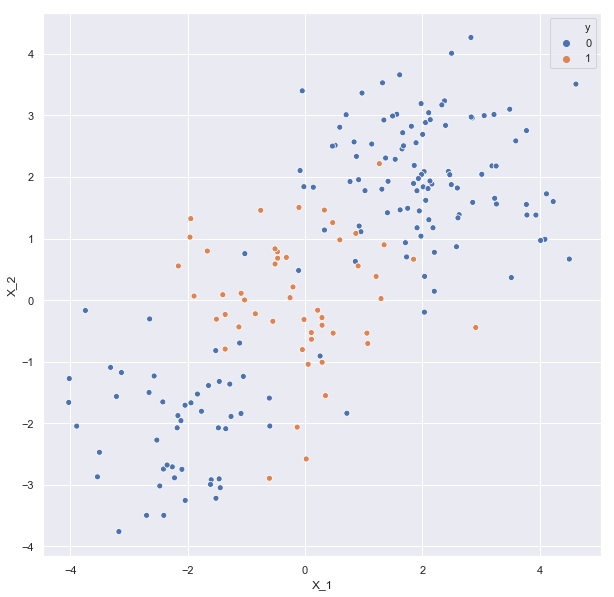

In [323]:
df = pd.concat([pd.DataFrame(data=X, columns=['X_1', 'X_2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='X_1', y='X_2', hue='y', data=df);

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [307]:
svc = SVC(C=1.0, kernel='rbf', gamma=1)
svc.fit(X_train, y_train)

#summary of the model

print(svc.get_params)
print("\n Accuracy: ",svc.score(X_train, y_train))

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

 Accuracy:  0.96


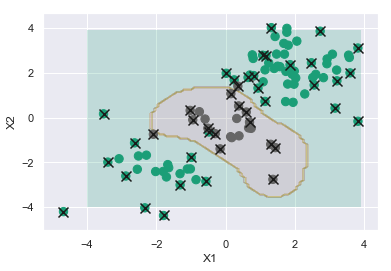

# Nr of support vectors 43


In [308]:
plot_svc(svc, X_train, y_train)

<bound method BaseEstimator.get_params of SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

 Accuracy:  1.0


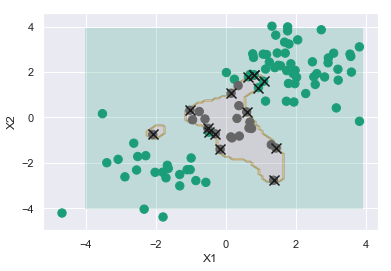

# Nr of support vectors 15


In [309]:
svc = SVC(C=1e5, kernel='rbf', gamma=1)
svc.fit(X_train, y_train)

#summary of the model

print(svc.get_params)
print("\n Accuracy: ",svc.score(X_train, y_train))
plot_svc(svc, X_train, y_train)

In [310]:
# Param tunning
c = [0.1 ,1 ,10 ,100 ,1000] 
gm = [0.5 ,1 ,2 ,3 ,4]
param_grid  = dict(gamma=gm, C=c)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best params {grid.best_params_}; Accuracy {grid.best_score_:.3f}")

Best params {'C': 10, 'gamma': 0.5}; Accuracy 0.950


/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [311]:
confusion_matrix(y_test, grid.best_estimator_.predict(X_test))

array([[68,  5],
       [ 4, 23]])

### 9.6.3 ROC

In [312]:
# Specify the most optimal params from the gridsearch C = 1 , gamma = 0.5
svc = SVC(kernel='rbf', gamma=0.5, C=1, random_state=0, probability=True).fit(X_train, y_train)

# predict_proba compute probabilities of possible outcomes for samples in X.
probs = svc.predict_proba(X_train)
preds = probs[:, 1]

false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_train, preds)

# area under curve metrics
auc = metrics.auc(false_positive_rate, true_positive_rate)

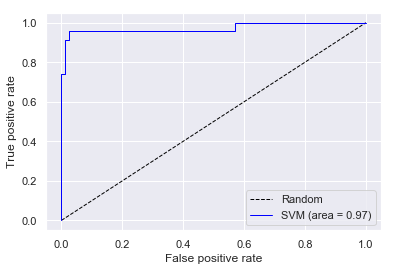

In [313]:
plt.plot(np.linspace(0, 1.0, 100), np.linspace(0, 1.0, 100), color='black', linestyle='--', lw=1, label='Random')
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=1, label=f'SVM (area = {auc:0.2f})')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend();

### 9.6.4 SVM with Multiple Classes

In [324]:
# The third class of observation
np.random.seed(66)

X_3 = np.vstack([X, np.random.randn(50,2)])
y_3 = np.hstack([y, np.repeat(2,50)])
X_3[y_3 ==0] = X_3[y_3 == 0] + 4


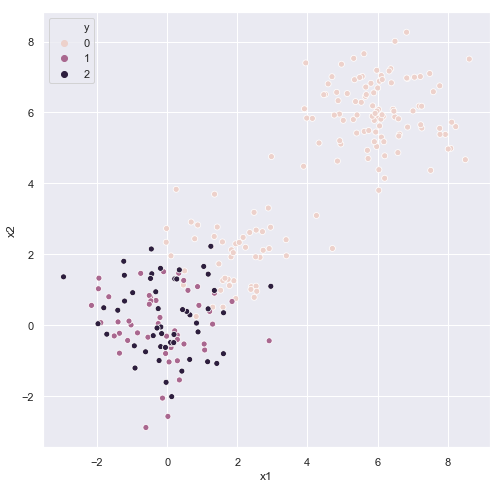

In [325]:
# plot for 3 classes
df = pd.concat([pd.DataFrame(data=X_3, columns=['x1', 'x2']), pd.Series(y_3, name='y')], axis=1)
plt.figure(figsize=(8, 8))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


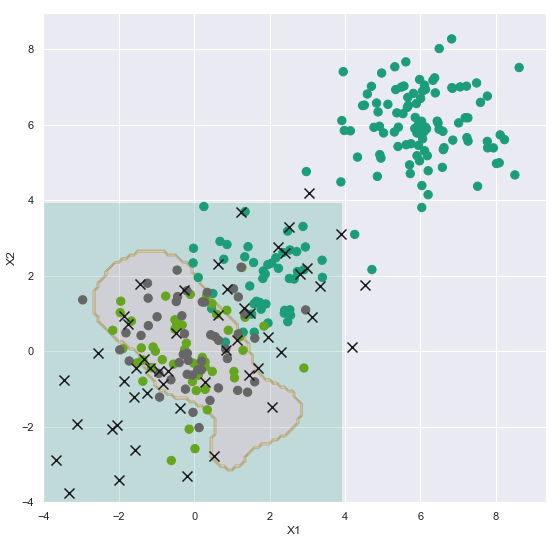

# Nr of support vectors 51


In [328]:
svc = SVC(C=1, kernel='rbf').fit(X_3, y_3)

plot_svc(svm,X_3, y_3)

### 9.6.5 Application to Gene Exprression Data

In [343]:
X_train = pd.read_csv('data/khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('data/khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
X_test = pd.read_csv('data/khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('data/khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()

/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [345]:
svc = SVC(kernel='linear', C=0.1).fit(X_train,y_train)

In [350]:
conf = confusion_matrix(y_train, svc.predict(X_train))
conf_df = pd.DataFrame(conf.T, index=svc.classes_, columns=svc.classes_)
conf_df.index.name = 'Predicted'
conf_df.columns.name = 'True'
conf_df

True,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [353]:
# try it for test

conf = confusion_matrix(y_test, svc.predict(X_test))
conf_df = pd.DataFrame(conf.T, index=svc.classes_, columns=svc.classes_)
conf_df.index.name = 'Predicted'
conf_df.columns.name = 'True'
conf_df

True,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


# Applied

In [107]:
# Generate a simulated two-class data set with 100 observations and two features in which there is a visible
# but non-linear separation between the two classes.

#np.random.seed(0)
x = np.random.normal(size=(100,2))
X = x**2  + x + np.random.normal(size=( 100,2))
y = np.concatenate((np.repeat(0, 50), np.repeat(1, 50)))

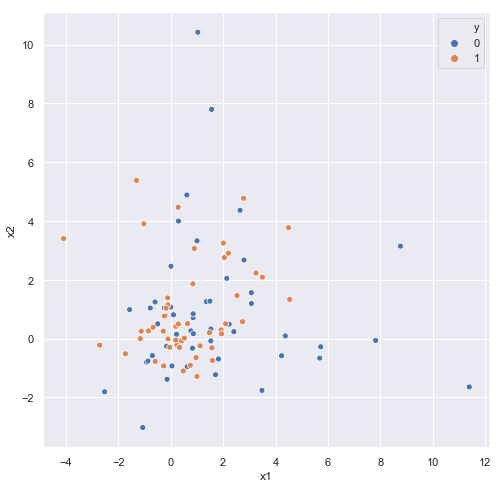

In [108]:
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(8, 8))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2, test_size=0.1)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

Training accuracy: 0.5444444444444444
Test accuracy    : 0.4


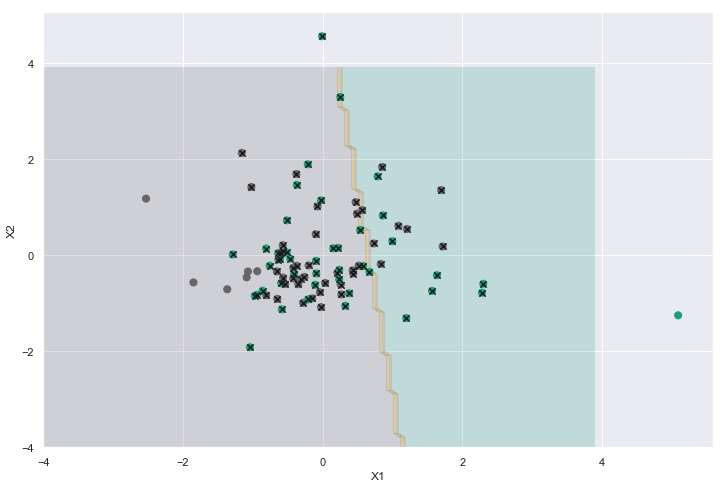

# Nr of support vectors 83


In [110]:
# Linear kernel
model = SVC(kernel='linear', gamma=1, C=1, random_state=0).fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

plot_svc(model, X_train, y_train)

Training accuracy: 0.5555555555555556
Test accuracy    : 0.2


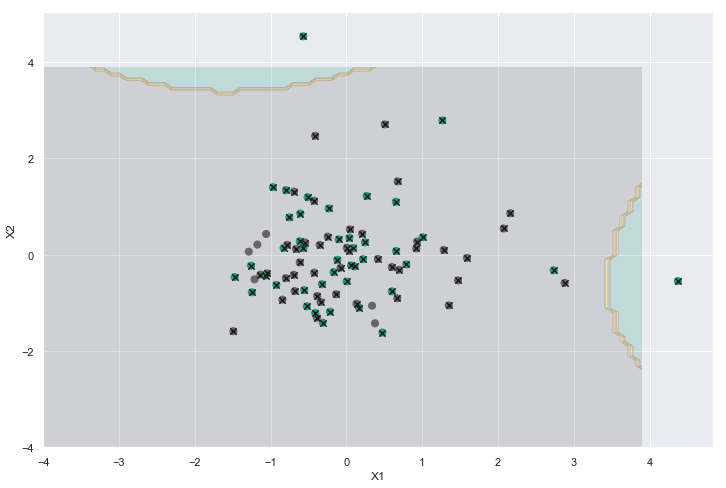

# Nr of support vectors 84


In [242]:
model = SVC(kernel='poly', degree=3, gamma=1, C=1, random_state=0).fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')


plot_svc(model, X_train, y_train)

Training accuracy: 0.6444444444444445
Test accuracy    : 0.3


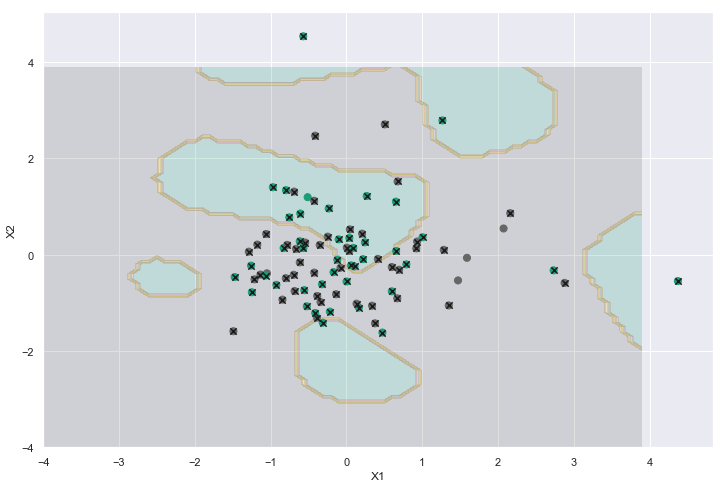

# Nr of support vectors 85


In [243]:

model = SVC(kernel='rbf', gamma=1, C=1, random_state=0).fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')


plot_svc(model, X_train, y_train)

In [244]:
# the polynomial and rbf kernel outperforms the linear kernel in accuracy for training and for testing data set

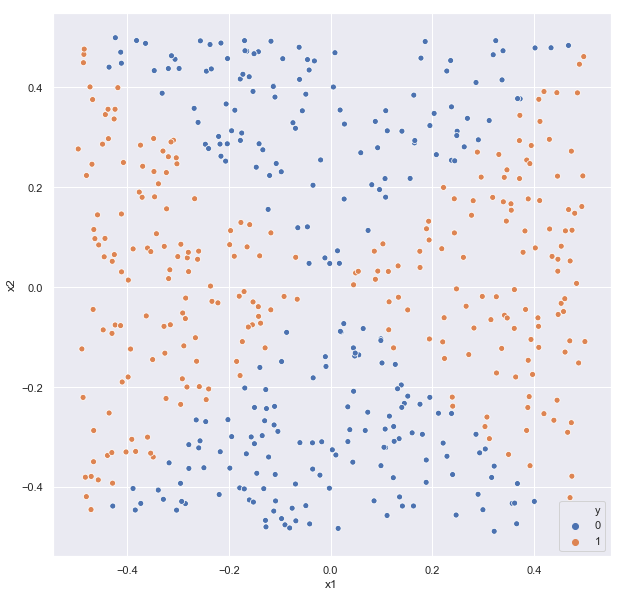

In [24]:
# 5. We willnow see that we can also obtain a non-linear decision boundary by
#performing logistic regression using non-linear transformations of the
#features.


# a.) Generate a data set with n = 500 and p = 2, such that the observations
#belong to two classes with a quadratic decision boundary between them


np.random.seed(213)
x1 = np.random.uniform(0, 1, 500) - 0.5
x2 = np.random.uniform(0, 1, 500) - 0.5
y = 1*(x1**2 - x2**2 > 0)

# plot the data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);



/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


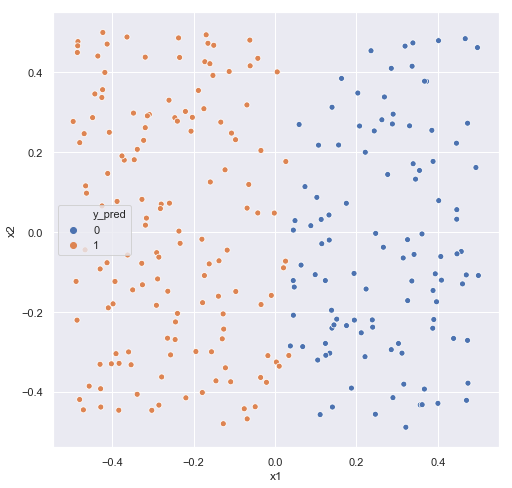

Training accuracy: 0.492
Test accuracy    : 0.424


In [25]:
X = df[['x1','x2']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)


model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_train)


df = pd.DataFrame({'x1':X_train[:,0], 'x2':X_train[:,1], 'y_pred':y_pred})
plt.figure(figsize=(8, 8))
sns.scatterplot(x='x1', y='x2', hue='y_pred', data=df)
plt.show();

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

In [26]:

x1_2 = np.power(x1,2).reshape(500,1)
x2_2 = np.power(x2,2).reshape(500,1)
X_new = np.hstack(((X,x1_2,x2_2)))

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


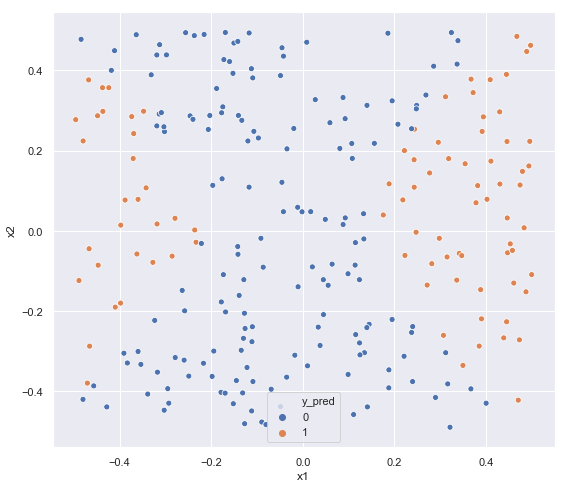

Training accuracy: 0.84
Test accuracy    : 0.864


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.5, random_state=45)

model = LogisticRegression().fit(X_train, y_train)

# Predict
y_pred = model.predict(X_train)


df = pd.DataFrame({'x1':X_train[:,0], 'x2':X_train[:,1], 'y_pred':y_pred})
plt.figure(figsize=(9, 8))
sns.scatterplot(x='x1', y='x2', hue='y_pred', data=df)
plt.show();

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

Training accuracy: 0.652
Test accuracy    : 0.58


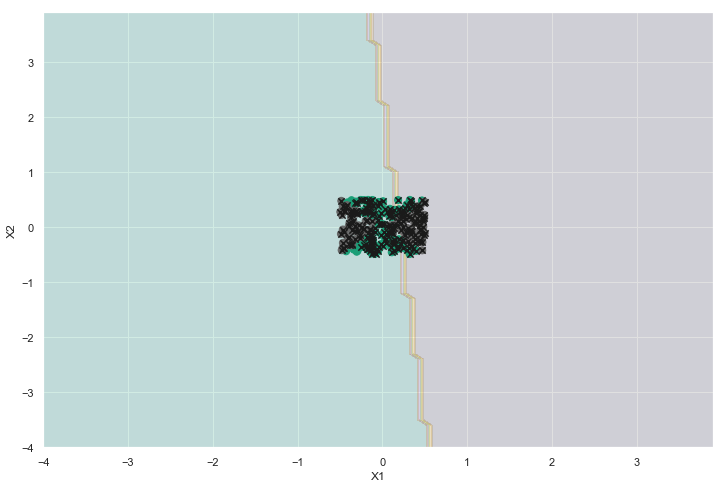

# Nr of support vectors 239


In [30]:
# Linear kernel

model = SVC(kernel='linear', gamma=1, C=1 ).fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

plot_svc(model, X_train, y_train)

Training accuracy: 0.996
Test accuracy    : 0.996


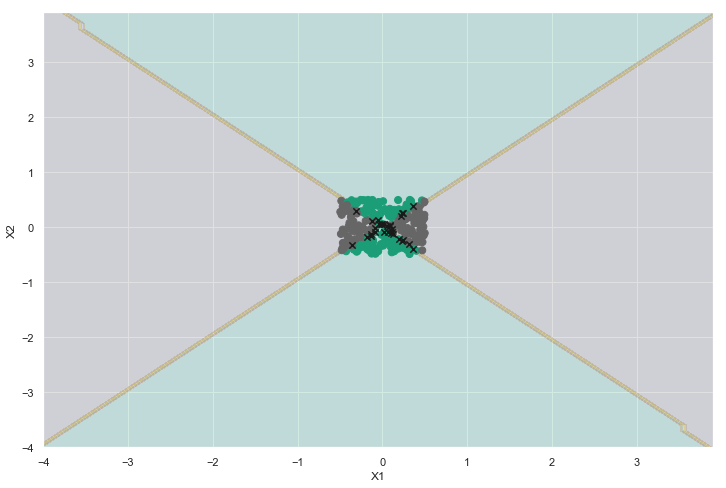

# Nr of support vectors 31


In [33]:
model = SVC(kernel='poly',degree=2, gamma=1, C=1000 ).fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

plot_svc(model, X_train, y_train)

Training accuracy: 0.984
Test accuracy    : 0.984


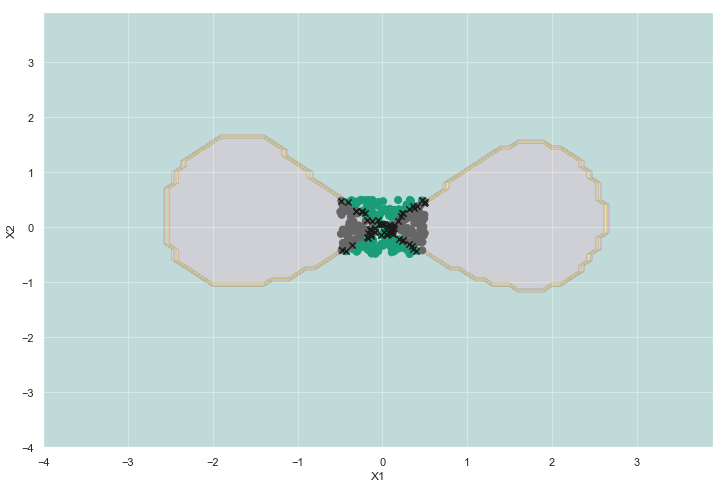

# Nr of support vectors 58


In [36]:
model = SVC(kernel='rbf', gamma=1, C=100 ).fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

plot_svc(model, X_train, y_train)

In [3]:
#Comment: SVC with polynomial and rbf kernel outperform the SVC with linear kernel and Logistic Regression model.

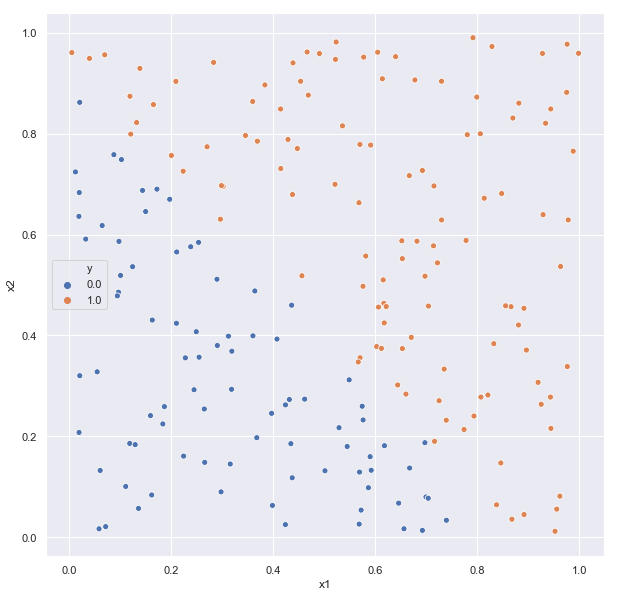

In [32]:
#  6
#  a.) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

np.random.seed(0)
x1 = np.random.uniform(0, 1, 200)
x2 = np.random.uniform(0, 1, 200)
y = np.zeros(200)
X = np.column_stack((x1,x2))
y[np.sum(X,axis=1)>0.9] = 1

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [41]:
# Possible values for C
C = [0.001, 0.01, 0.1,1,10,100,1000]
scores = []
for c in C:
    # training cv score
    model = SVC(kernel='linear', C=c)
    training_score = np.mean(cross_val_score(model, X_train, y_train, cv=3))
    
    # testing score
    model = SVC(kernel='linear', C=c).fit(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    scores += [[c, training_score, testing_score]]

df = pd.DataFrame(data=scores, columns=['C','Training Accuracy','Testing Accuracy'])
df

,C,Training Accuracy,Testing Accuracy
0,0.001,0.620098,0.54
1,0.010,0.620098,0.54
2,0.100,0.620098,0.55
3,1.000,0.911152,0.92
4,10.000,0.910539,0.99
5,100.000,0.989583,0.99
6,1000.000,0.989583,0.99


Text(0, 0.5, 'Accuracy')

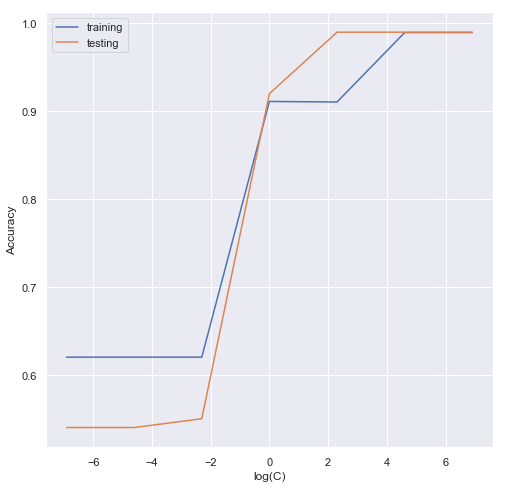

In [47]:
plt.figure(figsize=(8,8))
df['log(C)'] = np.log(df['C'])
sns.lineplot(x='log(C)', y='Training Accuracy', data=df, label='training')
sns.lineplot(x='log(C)', y='Testing Accuracy', data=df, label='testing')
plt.ylabel('Accuracy')

In [ ]:
# Comment: the model performs better in terms of accuracy for both training and testing
# for higher values of C.

In [3]:
##  7.

auto = pd.read_csv('./data/auto.csv')
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#Create a binary variable that takes on a 1 for cars with gas mileage above the median, 
#and a 0 for cars with gas mileage below the median.
auto['above_median_mpg'] = (auto['mpg'] > auto['mpg'].median())*1

auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,above_median_mpg
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [5]:
y = auto['above_median_mpg']
X = auto.iloc[:,:-2]

# Scale the data
X = preprocessing.scale(X)

/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [87]:
# the overal accuracy of the entire data set
C = np.logspace(-5, 5, 10)
scores = []

for c in C:
    
    model = SVC(kernel='linear', C=c, random_state=0)
    score = np.mean(cross_val_score(model, X, y, cv=5))
    scores += [[c, score]]

score_df = pd.DataFrame(data=np.asarray(scores), columns=['C',"Accuracy"])
score_df

,C,Accuracy
0,0.000010,0.869423
1,0.000129,0.869423
2,0.001668,0.892564
3,0.021544,0.913397
4,0.278256,0.954231
5,3.593814,0.982244
6,46.415888,0.997436
7,599.484250,0.997436
8,7742.636827,0.997436
9,100000.000000,0.997436


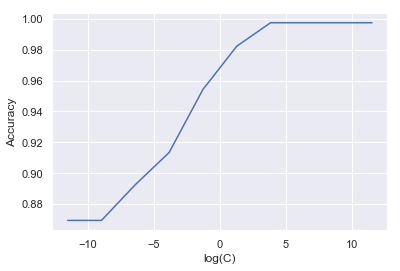

In [88]:
score_df['log(C)'] = np.log(score_df['C'])
sns.lineplot(x='log(C)', y='Accuracy', data=score_df);

In [ ]:
# Gridsearch for more specifications of the model

C = [0.01,0.1,1,10,100,1000]
gamma = [0.01,0.1,1,10]
kernels = ['rbf', 'poly']
degrees = [2,3] 

param_grid  = dict(gamma=gamma, C=C, kernel=kernels, degree=degrees)


svc_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, 
                        scoring='accuracy')
svc_grid.fit(X, y)

In [ ]:
pd.DataFrame(svc_grid.cv_results_)['rank_test_score'].sorted(ascending=True)

In [20]:
###     8

oj = pd.read_csv('./data/oj.csv',index_col=0)
oj.head(5)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [21]:
#  a.) Create a training set containing a random sample of 800 observations,
#      and a test set containing the remaining observations.
print(oj.shape)

X = oj.iloc[:,1:]
y = oj.iloc[:,0]

#convert Store7 from string in int
X['Store7'] = np.where(X['Store7'] == "Yes",1,0)

X_scaled = preprocessing.scale(X)

# select only 800 samples for the training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=(1070-800), random_state=12)

(1070, 18)


/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


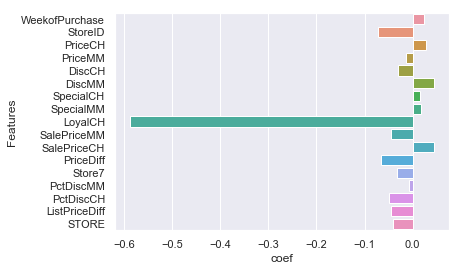

In [51]:
# b.) Fit a support vector classifier to the training data using cost=0.01, 
#     with Purchase as the response and the other variables as predictors. Use the summary() function to produce 
#     summary statistics, and describe the results obtained.


model = LinearSVC(C=0.01).fit(X_train, y_train)
names = X.columns.values.tolist()

df = pd.DataFrame({'Features': X.columns, 'coef': model.coef_.ravel()})
sns.barplot(x='coef', y='Features', data=df);

In [53]:
print("Train Accuracy: ", model.score(X_train, y_train))
print("Test accuracy: ",model.score(X_test, y_test))

Train Accuracy:  0.8375
Test accuracy:  0.8481481481481481


In [56]:
C = np.logspace(-2, 1, 10)
param_grid  = dict(C=C)
model_grid  = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=5, 
                           scoring='accuracy')
model_grid.fit(X, y)

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([ 0.01   ,  0.02154,  0.04642,  0.1    ,  0.21544,  0.46416,
        1.     ,  2.15443,  4.64159, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
print("Train Accuracy: ", model_grid.score(X_train, y_train))
print("Test accuracy: ",model_grid.score(X_test, y_test))

Train Accuracy:  0.79875
Test accuracy:  0.8074074074074075


In [ ]:
C = np.logspace(-2, 1, 5)
param_grid  = dict(C=C)
model_grid  = GridSearchCV(SVC(kernel='poly', degree=2), param_grid=param_grid, cv=5, 
                           scoring='accuracy')
model_grid.fit(X, y)

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/

In [ ]:
print("Train Accuracy: ", model_grid.score(X_train, y_train))
print("Test accuracy: ",model_grid.score(X_test, y_test))

In [ ]:
# Comment: SVC with   kernel has the best accuracy